# Entrega 1 – Análise e Predição de Rendimento Agrícola

Nesta entrega, o objetivo foi analisar uma base de dados de rendimento de plantações, identificar padrões e outliers por meio de clusterização, e construir cinco modelos preditivos distintos para estimar o rendimento da safra, conforme o enunciado proposto.

---

In [14]:
import numpy as np
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from pycaret.regression import *

# 1. Análise Exploratória dos Dados

A análise exploratória foi realizada para compreender a estrutura e as características dos dados. Foram utilizadas amostragens, visualização das colunas, inspeção do shape do DataFrame, além de gráficos de dispersão (pairplot) e boxplots para identificar padrões, relações entre variáveis e possíveis valores discrepantes (outliers).

---

In [15]:
df = pd.read_csv("crop_yield.csv")
df.sample(10)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
121,"Rubber, natural",2344.72,17.61,84.12,25.76,9573
120,"Rubber, natural",2592.35,17.61,85.07,25.56,9718
15,"Cocoa, beans",2414.79,18.18,85.76,25.93,7138
94,"Rice, paddy",1999.53,18.20,84.36,26.27,30676
76,Oil palm fruit,2333.46,18.50,84.85,26.43,189657
72,Oil palm fruit,2604.59,18.19,83.44,26.43,203399
33,"Cocoa, beans",2604.59,18.19,83.44,26.43,7991
64,Oil palm fruit,2892.78,18.49,86.09,26.18,190626
57,Oil palm fruit,2792.95,18.24,86.04,25.95,165993
9,"Cocoa, beans",1934.62,17.94,83.43,26.21,8300


In [16]:
df.columns

Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')

In [17]:
df.head()

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [18]:
df.shape

(156, 6)

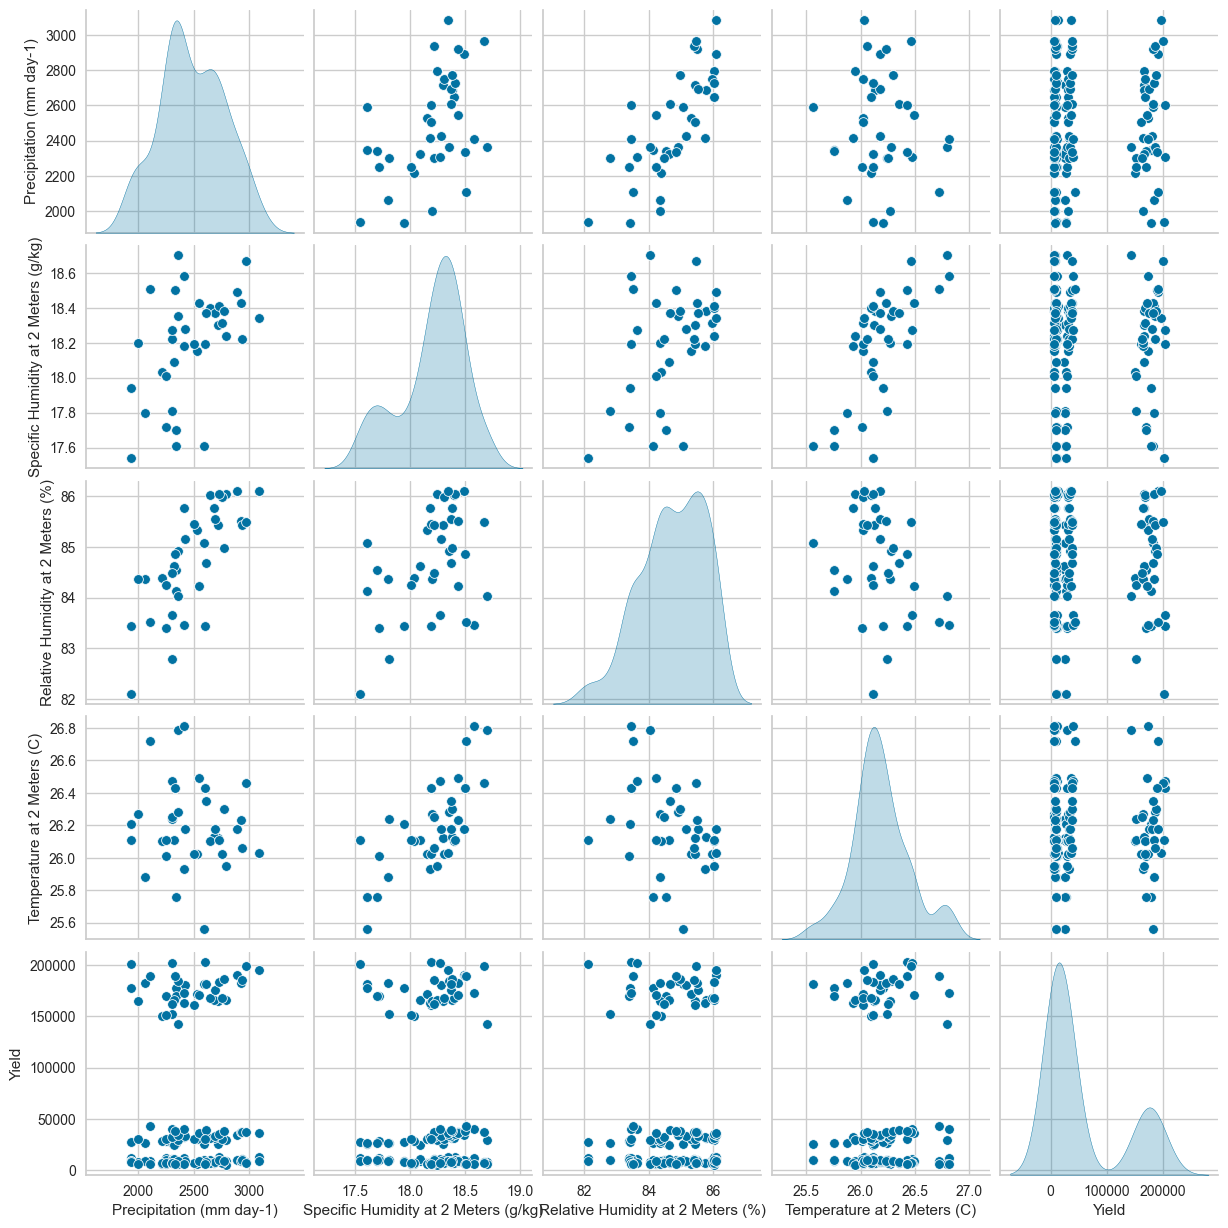

In [19]:
sns.pairplot(df, diag_kind="kde")

<Axes: >

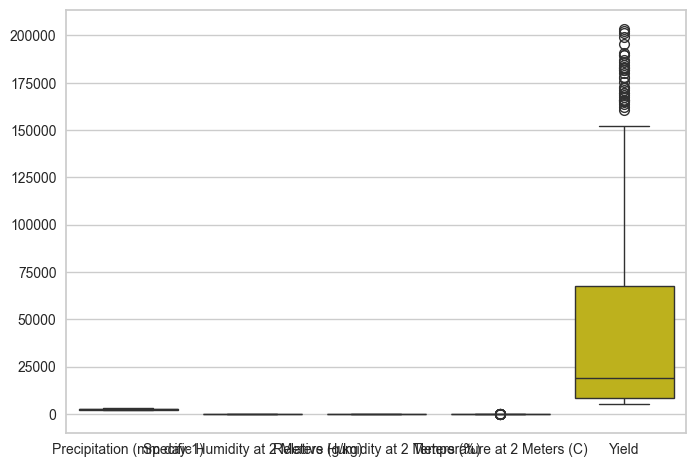

In [20]:
#BoxPlot
sns.boxplot(data=df)

# 2. Clusterização e Identificação de Outliers

Para encontrar tendências nos rendimentos e identificar cenários discrepantes, foi aplicada a técnica de clusterização HDBSCAN sobre as variáveis numéricas. Os clusters foram visualizados em gráficos, permitindo observar agrupamentos naturais e possíveis outliers, atendendo ao requisito de análise de cenários discrepantes.

---

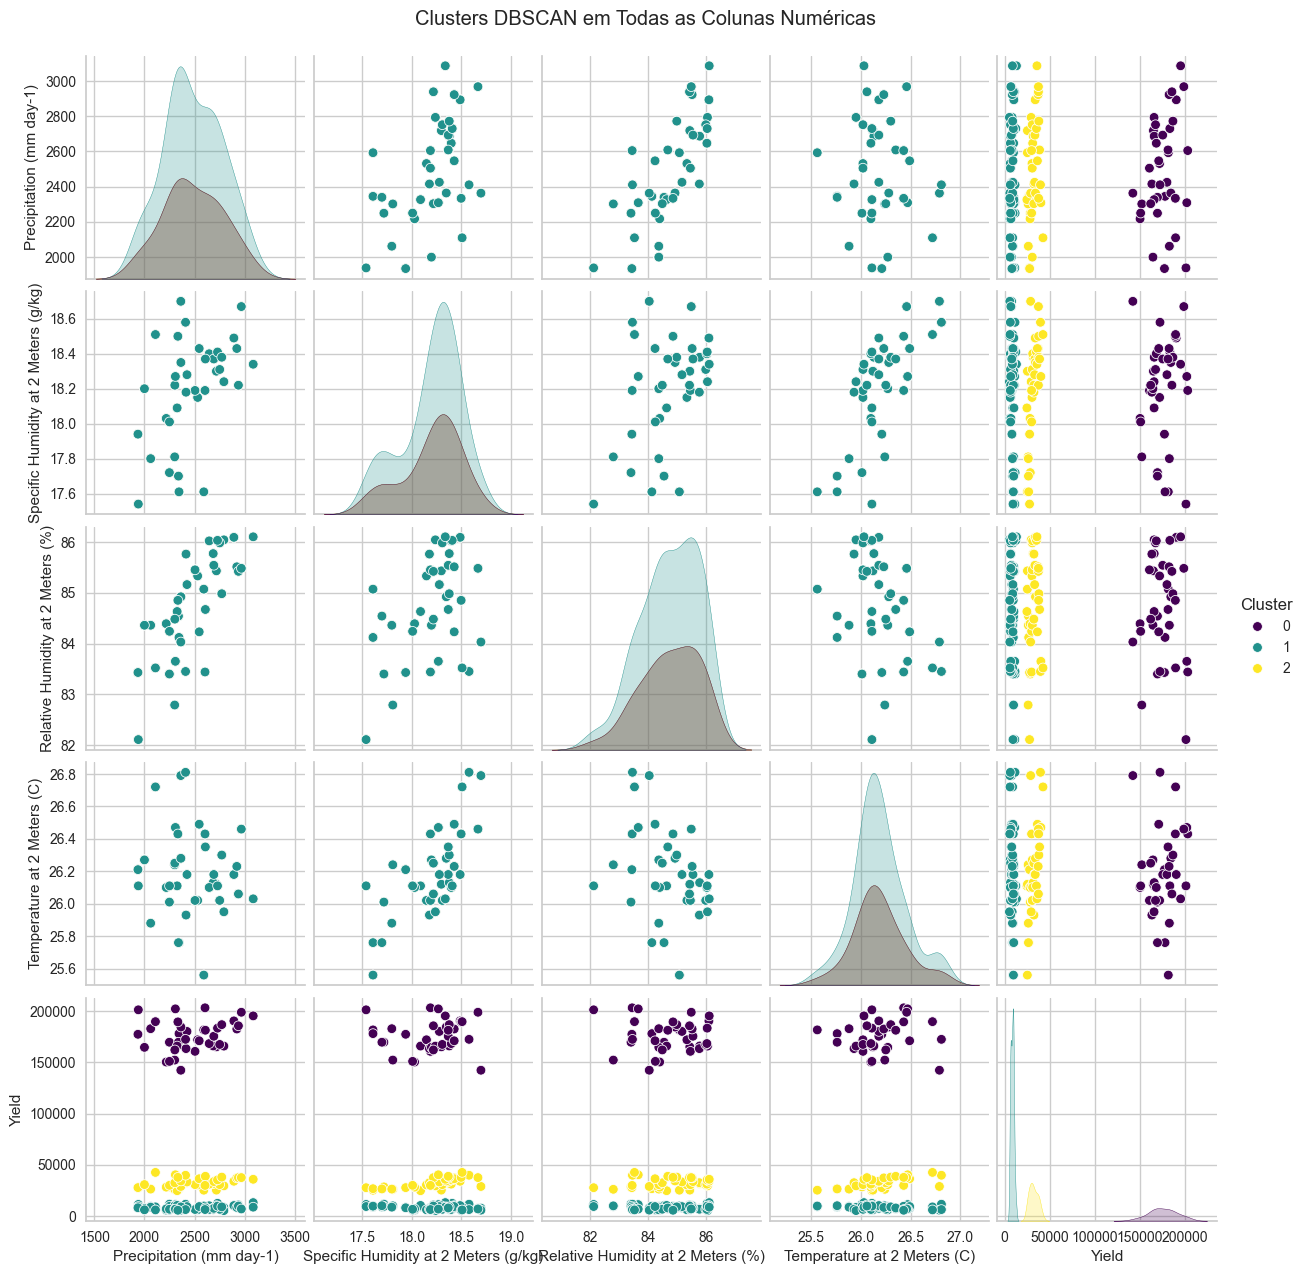

In [21]:
#Identificação de outliers com DBSCAN
X = df.select_dtypes(include=np.number)  # Seleciona apenas colunas numéricas
dbscan = HDBSCAN(min_cluster_size=5, min_samples=3)

labels = dbscan.fit_predict(X)

# Adiciona os rótulos dos clusters ao DataFrame
df_clusters = df.copy()
df_clusters['Cluster'] = labels

# Faz o pairplot colorindo pelos clusters
sns.pairplot(df_clusters, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Clusters DBSCAN em Todas as Colunas Numéricas', y=1.02)
plt.show()

# 3. Modelagem Preditiva com Cinco Algoritmos Diferentes

Foram desenvolvidos cinco modelos preditivos distintos utilizando diferentes algoritmos de regressão, conforme solicitado. O PyCaret foi utilizado para automatizar o pré-processamento, seleção, treinamento e avaliação dos modelos. As métricas de desempenho (R², RMSE, MAE) foram calculadas para cada modelo, e gráficos de erro e importância de variáveis foram gerados para análise dos resultados.

---

In [22]:
# Divisão de treino e teste
train, test = train_test_split(df,
                               test_size=0.2,
                               random_state=42)
# IMPORTANTE: o pycaret sempre começa com o setup()
reg = setup(data=train,         # Dados para treino
            target="Yield",   # Label a ser predito
            train_size=0.7)     # Proporção de dados para treino (o resto é validação)

,Description,Value
0,Session id,5185
1,Target,Yield
2,Target type,Regression
3,Original data shape,"(124, 6)"
4,Transformed data shape,"(124, 9)"
5,Transformed train set shape,"(86, 9)"
6,Transformed test set shape,"(38, 9)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


# 4. Seleção dos 5 melhores modelos treinados utilizando o PyCaret pelo R2 score.
Abaixo faremos um comparativo e seleção dos 5 melhores modelos treinados utilizando o PyCaret


In [23]:
# Agora vamos comparar diversos modelos de regressão
compare_models(sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,4124.0827,46963788.6976,6085.4598,0.9855,0.1699,0.1407,0.0090
et,Extra Trees Regressor,3838.5355,36996576.5665,5298.8830,0.9813,0.1699,0.1394,0.0150
rf,Random Forest Regressor,3874.1580,41839101.0553,5636.2021,0.9806,0.1718,0.1421,0.0190
gbr,Gradient Boosting Regressor,3985.4427,45108200.9346,5813.8257,0.9802,0.1763,0.1399,0.0110
ridge,Ridge Regression,5534.4618,65206532.6045,7238.1983,0.9775,0.3123,0.2889,0.0070
lasso,Lasso Regression,4897.4455,51678425.5675,6682.5798,0.9755,0.3540,0.2411,0.0060
llar,Lasso Least Angle Regression,4966.7658,52639655.6485,6760.9070,0.9753,0.3582,0.2454,0.0060
xgboost,Extreme Gradient Boosting,4247.7234,50467611.3125,6439.6334,0.9752,0.1827,0.1483,0.0180
lar,Least Angle Regression,5070.3467,54115793.3455,6867.7873,0.9752,0.3662,0.2538,0.0070
lr,Linear Regression,5070.3467,54115793.3455,6867.7873,0.9752,0.3662,0.2538,0.0060


AdaBoostRegressor(random_state=5185)

# 4. Análise dos melhores modelos treinados acima utilizando o PyCaret*

In [24]:
# Seleciona os 5 melhores modelos
top5_models = compare_models(n_select=5, sort='R2')

# Avalia cada modelo no conjunto de teste
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


top5_models_results = []

for i, model in enumerate(top5_models, 1):
    print(f"Modelo {i}: {model}")
    # Cria modelo treinado
    final_model = finalize_model(model)
    # Faz predições no conjunto de teste
    predictions = predict_model(final_model, data=test)
    y_true = test['Yield']
    y_pred = predictions['Yield']
    # Calcula métricas
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    top5_models_results.append(model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,4124.0827,46963788.6976,6085.4598,0.9855,0.1699,0.1407,0.0150
et,Extra Trees Regressor,3838.5355,36996576.5665,5298.8830,0.9813,0.1699,0.1394,0.0170
rf,Random Forest Regressor,3874.1580,41839101.0553,5636.2021,0.9806,0.1718,0.1421,0.0170
gbr,Gradient Boosting Regressor,3985.4427,45108200.9346,5813.8257,0.9802,0.1763,0.1399,0.0110
ridge,Ridge Regression,5534.4618,65206532.6045,7238.1983,0.9775,0.3123,0.2889,0.0060
lasso,Lasso Regression,4897.4455,51678425.5675,6682.5798,0.9755,0.3540,0.2411,0.0060
llar,Lasso Least Angle Regression,4966.7658,52639655.6485,6760.9070,0.9753,0.3582,0.2454,0.0060
xgboost,Extreme Gradient Boosting,4247.7234,50467611.3125,6439.6334,0.9752,0.1827,0.1483,0.0110
lar,Least Angle Regression,5070.3467,54115793.3455,6867.7873,0.9752,0.3662,0.2538,0.0050
lr,Linear Regression,5070.3467,54115793.3455,6867.7873,0.9752,0.3662,0.2538,0.0070


Modelo 1: AdaBoostRegressor(random_state=5185)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2434.5261,13956329.8015,3735.8172,0.9964,0.1327,0.1089


Modelo 2: ExtraTreesRegressor(n_jobs=-1, random_state=5185)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,2652.1891,16632231.9367,4078.2633,0.9957,0.0981,0.0775


Modelo 3: RandomForestRegressor(n_jobs=-1, random_state=5185)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2732.6981,22031797.9535,4693.8042,0.9943,0.1060,0.0758


Modelo 4: GradientBoostingRegressor(random_state=5185)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3020.6787,35193126.3753,5932.3795,0.9909,0.1339,0.0975


Modelo 5: Ridge(random_state=5185)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3418.1313,23815555.4533,4880.1184,0.9939,0.2419,0.1919


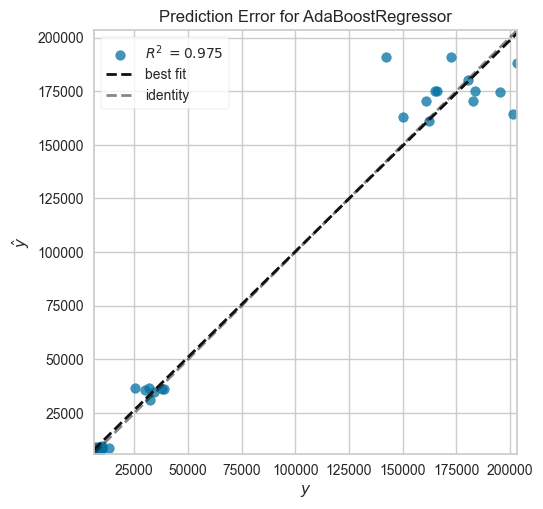

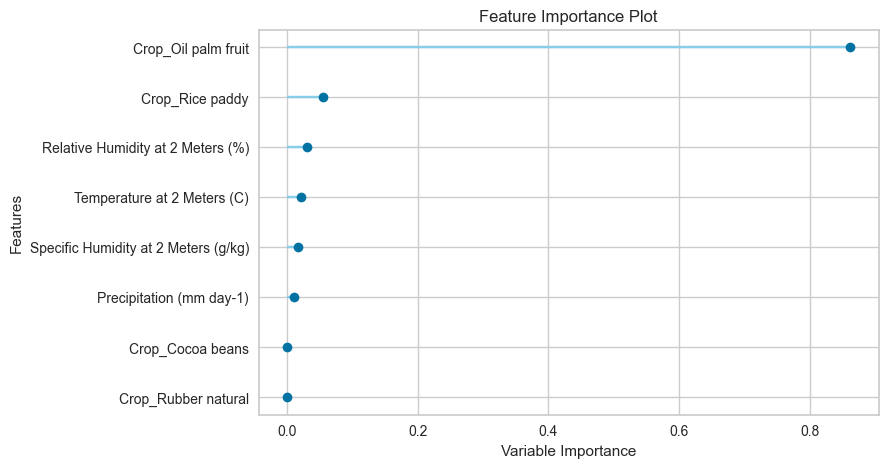

In [25]:

plot_model(top5_models_results[0], plot="error")
plot_model(top5_models_results[0], plot="feature")

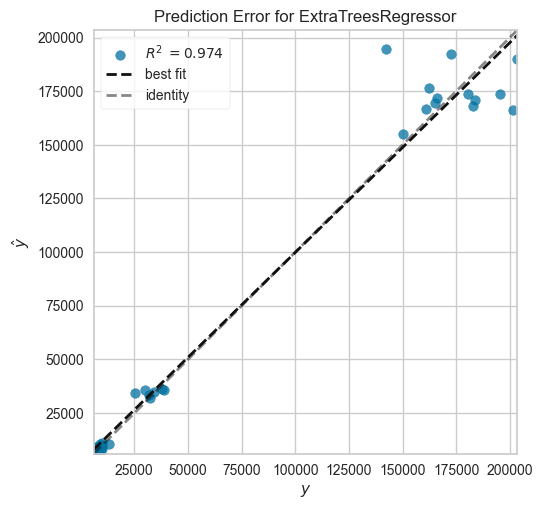

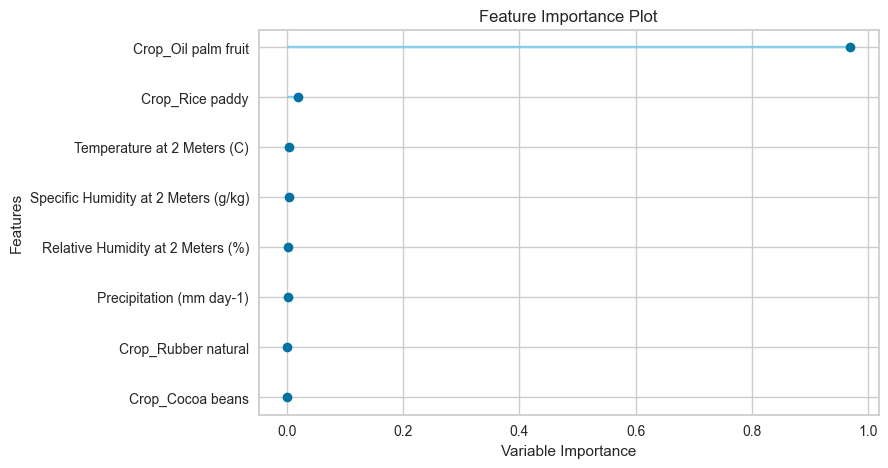

In [26]:
plot_model(top5_models_results[1], plot="error")
plot_model(top5_models_results[1], plot="feature")

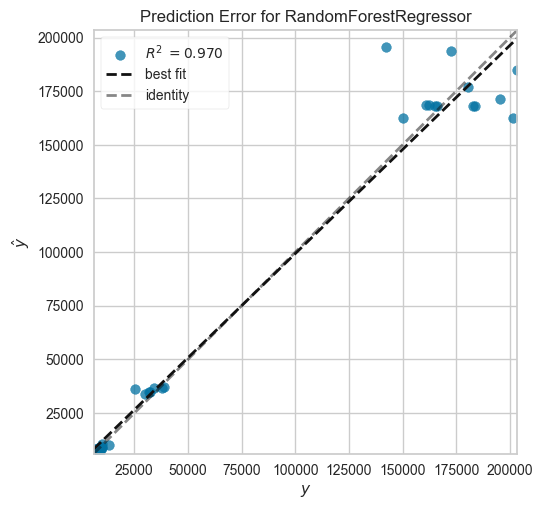

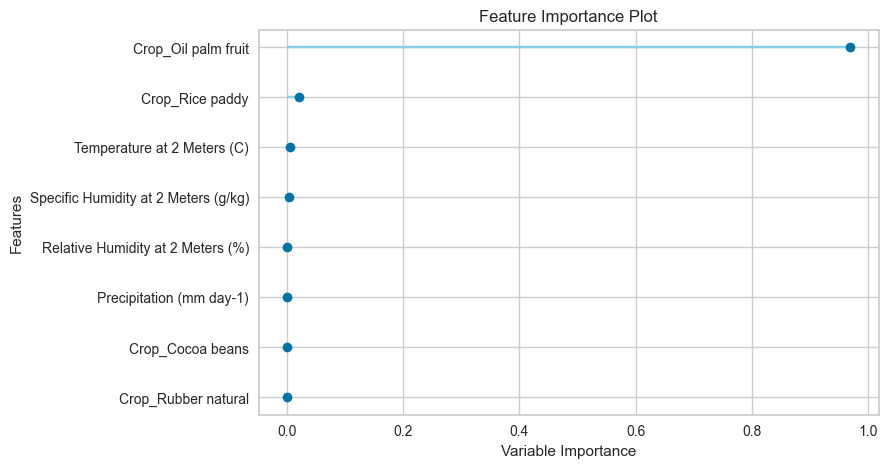

In [27]:
plot_model(top5_models_results[2], plot="error")
plot_model(top5_models_results[2], plot="feature")

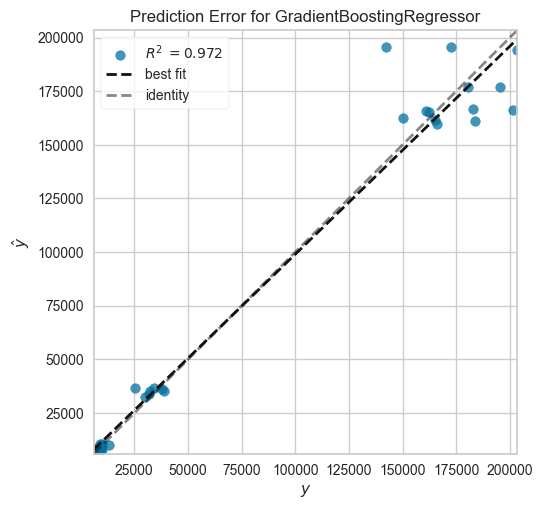

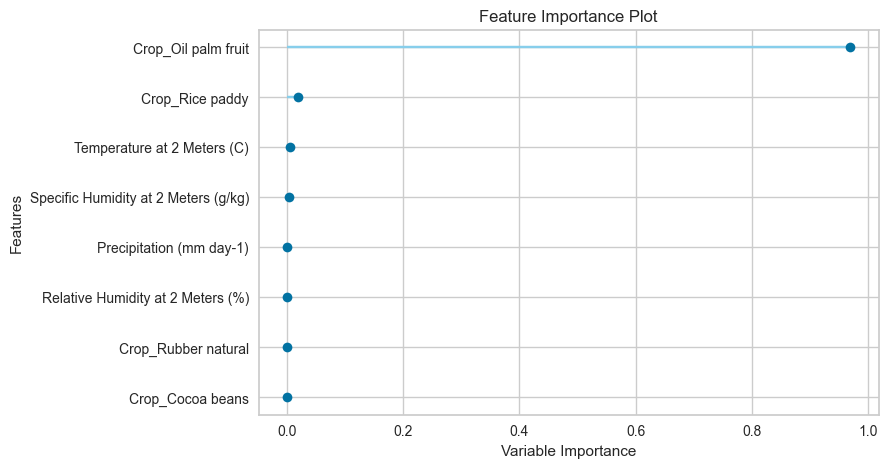

In [28]:
plot_model(top5_models_results[3], plot="error")
plot_model(top5_models_results[3], plot="feature")

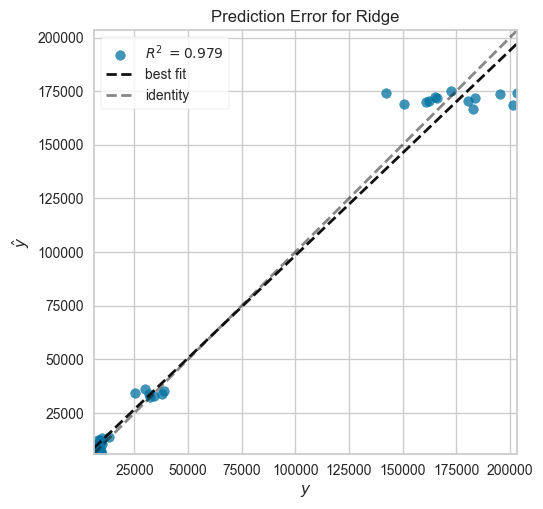

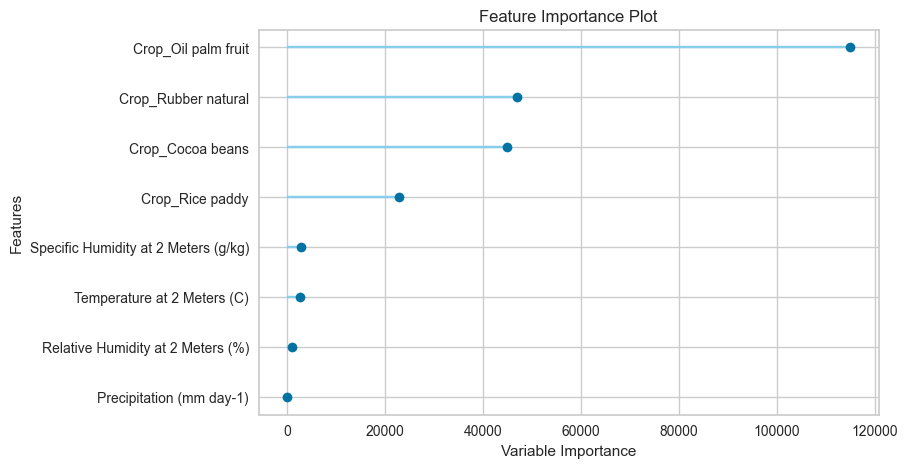

In [29]:
plot_model(top5_models_results[4], plot="error")
plot_model(top5_models_results[4], plot="feature")

# 5. Conclusão

Diante da proposta apresentada, conclui-se que a tarefa envolveu um fluxo completo de ciência de dados aplicado ao contexto agrícola. Inicialmente, a análise exploratória foi fundamental para compreender a base, suas variáveis e possíveis inconsistências. Em seguida, a utilização do algoritmo HDBSCAN para clusterização possibilitou identificar padrões nos rendimentos das plantações, além de destacar cenários discrepantes (outliers) de forma eficiente. Já na etapa de modelagem, o uso do PyCaret trouxe facilidades importantes, automatizando processos como o treinamento, comparação e avaliação de múltiplos algoritmos preditivos. Dessa forma, a construção de cinco modelos distintos seguiu boas práticas de Machine Learning e permitiu selecionar abordagens mais robustas para a previsão da produtividade das safras, garantindo resultados mais consistentes e alinhados às necessidades do problema.
